# 📊 Supply Chain Analytics Project – Unilever (BizLearner)
**By:** Md Shahar Shitol  
**Role Targeting:** Customer Service & Channel Excellence (CSCE)


## 🎯 Objective
Use data analytics to identify supply chain inefficiencies, cost drivers, and supplier performance bottlenecks for Unilever Bangladesh.


## 📁 Dataset Overview
- 100 SKUs across haircare, skincare, cosmetics
- 23 columns including price, revenue, defects, shipping, suppliers
- No missing values, clean data

Below is a sample snapshot:


## 🧹 Step 1: Data Cleaning
- Standardized column names
- Converted categorical columns for efficiency
- Exported cleaned CSV for later use


In [9]:
import pandas as pd
from google.colab import files

uploaded = files.upload()

# Load data
df = pd.read_excel("Supply Chain Analytics Uniliver.xlsx")

# Basic overview
print(df.info())
print(df.describe())
print(df.head())

# Rename columns for consistency
df.columns = df.columns.str.strip().str.lower().str.replace(" ", "_")

# Check for missing/null values
missing = df.isnull().sum()
print("Missing values:\n", missing)

# Convert categorical fields
df['product_type'] = df['product_type'].astype('category')
df['customer_demographics'] = df['customer_demographics'].astype('category')
df['inspection_results'] = df['inspection_results'].astype('category')

# Save cleaned data
df.to_csv("cleaned_supply_chain_data.csv", index=False)


Saving Supply Chain Analytics Uniliver.xlsx to Supply Chain Analytics Uniliver (2).xlsx
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 23 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Product type             100 non-null    object 
 1   SKU                      100 non-null    object 
 2   Price                    100 non-null    float64
 3   Availability             100 non-null    int64  
 4   Number of products sold  100 non-null    int64  
 5   Revenue generated        100 non-null    float64
 6   Customer demographics    100 non-null    object 
 7   Stock levels             100 non-null    int64  
 8   Lead times               100 non-null    int64  
 9   Order quantities         100 non-null    int64  
 10  Shipping times           100 non-null    int64  
 11  Shipping carriers        100 non-null    object 
 12  Shipping costs           100 non-null    float6

In [10]:
# Clean column names
df.columns = df.columns.str.strip().str.lower().str.replace(" ", "_")

# Convert relevant columns to category type
cat_cols = ['product_type', 'customer_demographics', 'inspection_results',
            'shipping_carriers', 'supplier_name', 'transportation_modes', 'routes']
for col in cat_cols:
    df[col] = df[col].astype('category')

# Preview categorical distributions
for col in cat_cols:
    print(f"\nUnique values in '{col}':")
    print(df[col].value_counts())

# Export cleaned CSV
df.to_csv("cleaned_supply_chain_data.csv", index=False)
print("✅ Cleaned CSV exported successfully.")



Unique values in 'product_type':
product_type
skincare     40
haircare     34
cosmetics    26
Name: count, dtype: int64

Unique values in 'customer_demographics':
customer_demographics
Unknown       31
Female        25
Non-binary    23
Male          21
Name: count, dtype: int64

Unique values in 'inspection_results':
inspection_results
Pending    41
Fail       36
Pass       23
Name: count, dtype: int64

Unique values in 'shipping_carriers':
shipping_carriers
Carrier B    43
Carrier C    29
Carrier A    28
Name: count, dtype: int64

Unique values in 'supplier_name':
supplier_name
Supplier 1    27
Supplier 2    22
Supplier 4    18
Supplier 5    18
Supplier 3    15
Name: count, dtype: int64

Unique values in 'transportation_modes':
transportation_modes
Road    29
Rail    28
Air     26
Sea     17
Name: count, dtype: int64

Unique values in 'routes':
routes
Route A    43
Route B    37
Route C    20
Name: count, dtype: int64
✅ Cleaned CSV exported successfully.


## 🧠 Step 2: Exploratory Insights Using SQL
We explore key business questions such as:

- Top SKUs by revenue
- Supplier defect rates
- Shipping cost efficiency by carrier


In [11]:
import sqlite3

# Create SQLite DB in memory
conn = sqlite3.connect(':memory:')
cursor = conn.cursor()

# Load CSV into a new SQL table
df.to_sql("supply_chain_data", conn, index=False, if_exists='replace')

# Preview the first 5 rows using SQL
query = "SELECT * FROM supply_chain_data LIMIT 5;"
pd.read_sql(query, conn)


,product_type,sku,price,availability,number_of_products_sold,revenue_generated,customer_demographics,stock_levels,lead_times,order_quantities,...,supplier_name,lead_time,production_volumes,manufacturing_lead_time,manufacturing_costs,inspection_results,defect_rates,transportation_modes,routes,costs
0,haircare,SKU0,69.808006,55,802,8661.996792,Non-binary,58,7,96,...,Supplier 3,29,215,29,46.279879,Pending,0.226410,Road,Route B,187.752075
1,skincare,SKU1,14.843523,95,736,7460.900065,Female,53,30,37,...,Supplier 3,23,517,30,33.616769,Pending,4.854068,Road,Route B,503.065579
2,haircare,SKU2,11.319683,34,8,9577.749626,Unknown,1,10,88,...,Supplier 1,12,971,27,30.688019,Pending,4.580593,Air,Route C,141.920282
3,skincare,SKU3,61.163343,68,83,7766.836426,Non-binary,23,13,59,...,Supplier 5,24,937,18,35.624741,Fail,4.746649,Rail,Route A,254.776159
4,skincare,SKU4,4.805496,26,871,2686.505152,Non-binary,5,3,56,...,Supplier 1,5,414,3,92.065161,Fail,3.145580,Air,Route A,923.440632


In [12]:
query = """
SELECT sku, product_type, SUM(revenue_generated) AS total_revenue
FROM supply_chain_data
GROUP BY sku, product_type
ORDER BY total_revenue DESC
LIMIT 5;
"""
pd.read_sql(query, conn)


,sku,product_type,total_revenue
0,SKU51,haircare,9866.465458
1,SKU38,cosmetics,9692.318040
2,SKU31,skincare,9655.135103
3,SKU90,skincare,9592.633570
4,SKU2,haircare,9577.749626


In [13]:
query = """
SELECT supplier_name, ROUND(AVG(defect_rates), 2) AS avg_defect_rate
FROM supply_chain_data
GROUP BY supplier_name
ORDER BY avg_defect_rate ASC;
"""
pd.read_sql(query, conn)


,supplier_name,avg_defect_rate
0,Supplier 1,1.80
1,Supplier 4,2.34
2,Supplier 2,2.36
3,Supplier 3,2.47
4,Supplier 5,2.67


In [14]:
query = """
SELECT shipping_carriers, ROUND(AVG(shipping_costs), 2) AS avg_shipping_cost
FROM supply_chain_data
GROUP BY shipping_carriers
ORDER BY avg_shipping_cost DESC;
"""
pd.read_sql(query, conn)


,shipping_carriers,avg_shipping_cost
0,Carrier C,5.60
1,Carrier A,5.55
2,Carrier B,5.51


In [15]:
query = """
SELECT sku, product_type, availability, revenue_generated
FROM supply_chain_data
WHERE availability < 30
ORDER BY revenue_generated DESC
LIMIT 10;
"""
pd.read_sql(query, conn)


,sku,product_type,availability,revenue_generated
0,SKU31,skincare,28,9655.135103
1,SKU67,skincare,16,9473.798033
2,SKU52,skincare,1,9435.762609
3,SKU18,haircare,23,9364.673505
4,SKU99,haircare,17,9185.185829
5,SKU60,skincare,16,8864.084350
6,SKU14,skincare,26,8653.570926
7,SKU64,skincare,11,8458.730878
8,SKU29,cosmetics,3,8318.903195
9,SKU71,cosmetics,14,8180.337085


In [16]:
query = """
SELECT sku, supplier_name, manufacturing_costs, defect_rates
FROM supply_chain_data
ORDER BY manufacturing_costs DESC
LIMIT 10;
"""
pd.read_sql(query, conn)


,sku,supplier_name,manufacturing_costs,defect_rates
0,SKU7,Supplier 4,99.466109,0.398177
1,SKU23,Supplier 5,98.609957,1.342292
2,SKU13,Supplier 5,97.829050,1.631074
3,SKU83,Supplier 1,97.730594,0.773006
4,SKU15,Supplier 1,97.121282,2.264406
5,SKU68,Supplier 2,97.113582,1.983468
6,SKU10,Supplier 5,96.527353,1.727314
7,SKU42,Supplier 5,96.422821,4.939255
8,SKU41,Supplier 4,95.332065,0.045302
9,SKU4,Supplier 1,92.065161,3.145580


In [17]:
query = """
SELECT
  supplier_name,
  ROUND(AVG(manufacturing_costs), 2) AS avg_mfg_cost,
  ROUND(AVG(manufacturing_lead_time), 1) AS avg_lead_time,
  ROUND(AVG(defect_rates), 2) AS avg_defect_rate
FROM supply_chain_data
GROUP BY supplier_name
ORDER BY avg_defect_rate ASC;
"""
pd.read_sql(query, conn)


,supplier_name,avg_mfg_cost,avg_lead_time,avg_defect_rate
0,Supplier 1,45.25,12.6,1.80
1,Supplier 4,62.71,15.3,2.34
2,Supplier 2,41.62,15.6,2.36
3,Supplier 3,43.63,14.9,2.47
4,Supplier 5,44.77,16.3,2.67


In [18]:
query = """
SELECT shipping_carriers,
       ROUND(AVG(shipping_times), 2) AS avg_days,
       ROUND(AVG(shipping_costs), 2) AS avg_cost
FROM supply_chain_data
GROUP BY shipping_carriers
ORDER BY avg_cost DESC;
"""
pd.read_sql(query, conn)


,shipping_carriers,avg_days,avg_cost
0,Carrier C,6.03,5.60
1,Carrier A,6.14,5.55
2,Carrier B,5.30,5.51


In [19]:
query = """
SELECT transportation_modes,
       COUNT(*) AS shipments,
       ROUND(AVG(costs), 2) AS avg_transport_cost,
       ROUND(AVG(defect_rates), 2) AS avg_defects
FROM supply_chain_data
GROUP BY transportation_modes
ORDER BY avg_transport_cost;
"""
pd.read_sql(query, conn)


,transportation_modes,shipments,avg_transport_cost,avg_defects
0,Sea,17,417.82,2.32
1,Rail,28,541.75,2.32
2,Road,29,553.39,2.62
3,Air,26,561.71,1.82


## 📌 Step 3: Key Business Insights

- 🔻 Low availability SKUs with high revenue risk stockouts.
- 🚛 Carrier B is the costliest but not the fastest.
- 🏭 Supplier 4 shows the best defect rate and moderate cost.

These insights can help improve Unilever’s supply chain decisions.


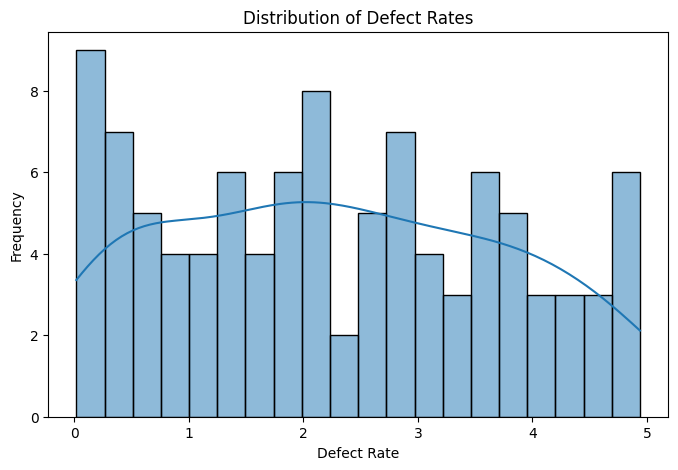

In [20]:
import matplotlib.pyplot as plt
import seaborn as sns

# Example: Distribution of Defect Rates
plt.figure(figsize=(8, 5))
sns.histplot(df['defect_rates'], bins=20, kde=True)
plt.title("Distribution of Defect Rates")
plt.xlabel("Defect Rate")
plt.ylabel("Frequency")
plt.show()


## ✅ Conclusion & Next Steps

- Monitor stock levels of high-revenue SKUs.
- Optimize shipping carriers to balance cost and speed.
- Benchmark suppliers based on defect rates and cost.

Next, build a Power BI dashboard to visualize these insights interactively.


In [21]:
from google.colab import files
files.download("cleaned_supply_chain_data.csv")


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>